# **2022-ice_discharge** - Calculate Grounded Ice Flux

This notebook provides a general workflow to estimate grounded ice fluxes for [any] mapped ice boundaries in Antarctica. The following datasets are used *(as of Version -1.0)*:
* MEaSUREs BedMachine Bed Topography
* MEaSUREs Grounding Line
* MEaSUREs Ice Boundaries
* ATL14 Gridded Land Ice Height
* ATL15 Gridded Land Ice Height Change
* ITS_LIVE Ice Velocity (2018)

## Contributors

* Mark Hehlen
* Bryony Freer
* Emily Glazer
* Hui Gao
* Julia Andreasen
* Lizzie Hebel
* Lawrence Bird

## General workflow

The general approach for this work is as follows:
1. Define an area-of-interest (ice boundary)
2. Ingest key datasets from NSIDC
3. Crop Antarctica-wide datasets to given area-of-interest

4. 
- Download ATL14 (specific resolution)
- Download ATL15 (specific resolution)
- Can we do this for a line? if so, just download the data for the given flux gate (use grounding line to start with)
- Ingest ATL14 & AT15 data
- Crop ATl14 & ATL15 data for the aoi
- Calculate ATL14 + ATL15 DEMs (12 total)

5.
- Download velocity data (ITS_LIVE / MEaSUREs)
- Ingest velocity data
- Crop velocity data for the aoi

6. Align all raster data into A) consistent CRS and B) consistent grid.

7. Calculate ice thickness as the difference between ICESat-2 DEM and MEaSUREs bed topography DEM

8. Define a "flux-gate" based on mapped grounding line locations. Grounding lines are moved "upstream" X km to remove influence from floating ice
9. Calculate the flux across the flux-gate at a given time (t)
10. Plot a timeseries of the ice flux

### Future Expansion

Potential expansion of the current workflow includes:
* Use ATL06 along-track data to compute velocities at higher temporal resolution than available in gridded products (e.g., ITS_LIVE).
* Consider expanding velocity estimates to account for basal/shear stresses etc.
* Better define flux gates by shifting the grounding line upstream (based on flow directions) to remove effects of floating data.
 


# Step 0 - Dependancies & Authentication

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
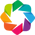

In [2]:
# Import dependancies

import icepyx as ipx
from earthdata import Auth, DataCollections, DataGranules, Store # Used to ingest data from NSIDC
import geopandas as gpd # Used to subset regions using shapefile
import rioxarray as rx # Used to read raster data from hdf5 files
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
#%matplotlib widget 

In [3]:
# Authenticate Earthdata credentials

auth = Auth().login(strategy='netrc')
if auth.authenticated is False:
    auth = Auth().login(strategy='interactive')
    
#earthdata_uid = 'lawrenceabird'
#email = 'lawrence.bird@monash.edu'

You're now authenticated with NASA Earthdata Login


# Step 1 - Define static variables & Required processing steps

In [4]:
# Set a location to store datasets
data_loc = "/home/jovyan/shared/ice-discharge-data/"

# Define collection IDs for all NSIDC datasets that are required
bedmachine_collection = 'C1664160168-NSIDC_ECS' # MEaSUREs BedMachine dataset
boundaries_collection = 'C1454773262-NSIDC_ECS' # MEaSUREs Boundaries dataset
velocity_collection = 'C1414573008-NSIDC_ECS' # MEaSUREs Velocity dataset

# Define the ice boundary/basin of interest
basin = "Totten"


In [ ]:
# What processing steps are required?
download_nsidc = False
download_atl = False
download_itslive = False

# Step 2 - Download (if required) key datasets

## Download NSIDC Datasets

In [ ]:
# Download the NSIDC data (if required) - This only needs to be completed once as these datasets are Antarctic-wide.
if download_nsidc == True:
    access = Store(auth)
    
    # --- MEaSUREs BedMachine ---
    bedmachine_query = DataGranules(auth).concept_id(bedmachine_collection)
    bedmachine_granules = bedmachine_query.get()
    bedmachine_files = access.get(bedmachine_granules, local_path = data_loc)
    
    # --- MEaSUREs Velocity ---
    # velocity_query = DataGranules(auth).concept_id(velocity_collection)
    # velocity_granules = velocity_query.get()
    # velocity_files = access.get(velocity_granules, local_path = data_loc)
    
    # --- MEaSUREs Boundaries ---
    boundaries_query = DataGranules(auth).concept_id(boundaries_collection)
    boundaries_granules = boundaries_query.get()
    
    # TEMP: The following code section is a temporary fix to grab all files for multi-file granules. This is fixed in an udpated version of earhtdata.
    # Create a list of links to individual data files from each granule
    data_links = [granule.data_links() for granule in boundaries_granules]

    # Loop over the list of data links for each granule - for each file, wget the file.
    for i in data_links:
        tmp = i
        for j in tmp:
            #print(j)
            ! wget -nc {j} -P {data_loc+"/boundaries"}

## Download ITS_LIVE Velocity Dataset

In [ ]:
# Download ITS_LIVE Annual velocity dataset - This only needs to be completed one as these datasets are Antarctic-wide.
if download_itslive == True:
    # Resolution=input("Enter the desired velocity resolution (120 or 240): ")
    # MosaicYear=input("Enter the desired year for its-live velocity mosaic (most recent 2018): ")

    Resolution = "240"
    MosaicYear = "2018"

    url = "https://its-live-data.s3.amazonaws.com/velocity_mosaic/landsat/v00.0/annual/ANT_G0"+Resolution+"_"+MosaicYear+".nc"

    ! wget -nc {url} -P {data_loc+"itslive"}

## Download ATL14 and ATL15 Datasets

In [ ]:
if download_atl == True:
    
    # Ingest the boundaries to use as spatial extent for downloading ATL data
    boundaries = gpd.read_file(data_loc+"/boundaries/IceBoundaries_Antarctica_v02.shp")# Ice Boundaries shapefile
    
    # Select single basin to extract bounds (doesnt matter which one) 
    aoi = boundaries[(boundaries["NAME"] == basin) & (boundaries["TYPE"] == "GR")]

    # Rproject to EPSG 4326 (needed for icepyx)  
    def reproject(geom, epsg="EPSG:4326"):
        '''Function to reproject GPD polygon (default EPSG=4326)'''
        return geom.to_crs(epsg)
    
    # Reproject the aoi
    aoi_proj = reproject(aoi)

    # Extract bounding box coordinates and set to spatial extent for icepyx query 
    spatial_extent = list(aoi_proj.total_bounds)

In [ ]:
if download_atl == True:

    #Set inputs to Icepyx download query 
    atl_15_name = 'ATL15'    
   
    # Make ipx Queries
    atl_15 = ipx.Query(atl_15_name, spatial_extent)
    # atl_15.visualize_spatial_extent()    

    # Authenticate EarthData Login
    atl_15.earthdata_login(earthdata_uid, email)
    
    # Order granules
    atl_15.order_granules()
    
    # Download to data_loc
    atl_15.download_granules(data_loc+"atl15/") 
    

In [ ]:
if download_atl == True:
    
    #Set inputs to Icepyx download query 
    atl_14_name = "ATL14"
    
    # Make ipx Queries
    atl_14 = ipx.Query(atl_14_name, spatial_extent)
    # atl14_.visualize_spatial_extent()
    
    # Authenticate EarthData Login
    atl_14.earthdata_login(earthdata_uid, email)
        
    # Order granules
    atl_14.order_granules()
    
    # Download to data_loc
    atl_14.download_granules(data_loc+"atl14/") 

# Step 3 - Crop NSIDC Datasets to area-of-interest

In [7]:
# Ingest required NSIDC datasets
boundaries = gpd.read_file(data_loc+"/boundaries/IceBoundaries_Antarctica_v02.shp")# Ice Boundaries shapefile
gl = gpd.read_file(data_loc+"/boundaries/GroundingLine_Antarctica_v02.shp")# Grounding line shapefile
bed = rx.open_rasterio(data_loc+"BedMachineAntarctica_2019-11-05_v01.nc", variable = "bed") # BedMachine 

BedMachineAntarctica CRS:  +init=epsg:3031
aoi shapefile CRS:  epsg:3031
gl shapefile CRS:  epsg:3031

Still using drainage basin outline.
Set buffer_distance to 0 if you are only interested in grounding line.
Or assign a positive number >= 500 to buffer_distance if you want to get an area upstream of grounding line.


<AxesSubplot:>

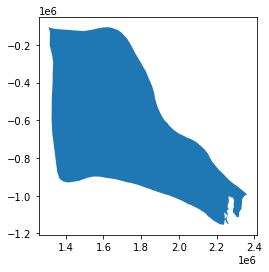

In [8]:
# Isolated boundary for only grounded ice (GR) for the chosen basin
aoi = boundaries[(boundaries["NAME"] == basin) & (boundaries["TYPE"] == "GR")]


"""
I moved the cell to here as we need to check the CRS before cropping
Feel free to merge or separate into different cells
"""
# Check the CRS of all NSIDC datasets
print(f"BedMachineAntarctica CRS: ", bed.attrs['proj4'])
print(f"aoi shapefile CRS: ", aoi.crs)
print(f"gl shapefile CRS: ", gl.crs)


#------------------------------------------------------------------------------------------------------------------------
## Change aoi from drainage basin to grounding line or an area upstream of grounding line within certain distance
gl_line = gl.geometry.boundary # Get grounding line linestring
gl_aoi = gpd.clip(gl_line, aoi) # Clip Grounding line to aoi

buffer_distance = -1 # meter, distance of buffer: set to 0 if only along the grounding line
"""
BedMachineAntarctica has a 500m resolution, only distance >= this value would create meaningful buffer area.
min_buffer_distance value can be adjusted according to different datasets
"""
min_buffer_distance = 500 
if buffer_distance == 0: # Only along the grounding line
    aoi = gl_aoi
elif buffer_distance >= min_buffer_distance: # use a buffer to crop an area upstream of grounding line
    aoi = gpd.clip(aoi, gl) # in case ice boundary is outside of GL: exclude potential area downstream of grounding line
    aoi = gpd.clip(aoi, gl_aoi.buffer(buffer_distance, cap_style=1, join_style=1))
else:
    print("\nStill using drainage basin outline.\nSet buffer_distance to 0 if you are only interested in grounding line.")
    print("Or assign a positive number >= "+str(min_buffer_distance)+" to buffer_distance if you want to get an area upstream of grounding line.")

aoi.plot()

In [9]:
'''
Clip raster using a shapefile
aoi: shapefile of interested region; ds: xarray dataset (bedmachine, atl14/15,...);
x_dim/y_dim: variable name of x and y dimensions in xarray dataset (typically is "x", "y")
'''
def clip_raster(aoi, ds, x_dim, y_dim):
    # Clip a xarray dataset Data to aoi
    ds.rio.set_spatial_dims(x_dim=x_dim, y_dim=y_dim, inplace=True)
    ds.rio.write_crs("EPSG:3031", inplace=True) # Write the CRS to the bed object so that it's consistent with other objects
    ds_aoi = ds.rio.clip(aoi.geometry, aoi.crs)
    return ds_aoi

CPU times: user 4.49 s, sys: 1.04 s, total: 5.53 s
Wall time: 5.61 s


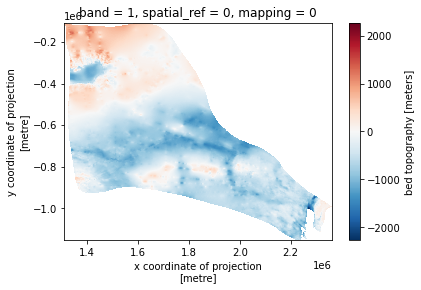

In [10]:
%%time
# Clip/Mask the NSIDC Raster product(s) to the aoi basin boundary

# Clip BedMachine Data to aoi
bed_aoi = clip_raster(aoi, bed, "x", "y")

# Mask BedMachine Data to aoi
bed_aoi_masked = bed_aoi.where(bed_aoi['bed'] != -9999.) # Replace -9999. with nan for display
bed_aoi_masked['bed'].plot()

In [11]:
%%time

# Crop ATL14 and ATL15 using aoi shapefile
atl_n = ["atl14", "atl15"]
for fdir in atl_n:
    if fdir == "atl14":
        atl_f = data_loc + fdir +"/ATL14_AA_0311_100m_001_01.nc"
        atl14 = xr.open_dataset(atl_f)
        atl_h = atl14[['h']]
        
        # Crop using the bounding box of aoi first
        aoi_bound_x = [aoi.total_bounds[0], aoi.total_bounds[2]]
        aoi_bound_y = [aoi.total_bounds[1], aoi.total_bounds[3]]
        atl_h = atl_h.rio.write_crs("EPSG:3031", inplace=True)
        atl_h = atl_h.rio.clip_box(
            minx=min(aoi_bound_x),
            miny=min(aoi_bound_y),
            maxx=max(aoi_bound_x),
            maxy=max(aoi_bound_y),
        )
        
        # Crop using the aoi shapefile
        atl_h_aoi = clip_raster(aoi, atl_h, "x", "y")
    elif fdir == "atl15":
        atl_f = data_loc + fdir +"/ATL15_AA_0311_01km_001_01.nc"
        atl15 = xr.open_dataset(atl_f, group="delta_h")
        atl_dh = atl15[['delta_h']]
        atl_dh_aoi = clip_raster(aoi, atl_dh, "x", "y")


CPU times: user 9.15 s, sys: 1.94 s, total: 11.1 s
Wall time: 11.9 s


In [ ]:
atl_h_aoi.h.plot()

In [ ]:
atl_dh_aoi

In [ ]:
for i in range(12):
    plt.figure()
    atl_dh_aoi.delta_h[i,:,:].plot()
    plt.savefig(f'../../../data/figs/atl15_dhdt_cycle{i}.png')
    plt.show()

# Step 4 - Calculate Seasonal DEMs from ATL Data (for Plotting Basin Change)

* **atl_h_aoi**: ATL14 DEM (2020.0): 
* **atl_dh_aoi**: ATL15 dhdt (per cycle - 12 timestamps)  

In [13]:
#Set output directory for figures -- CHANGE THIS TO YOUR OWN FILE PATH
fig_dir = '../../../data/figs/'

In [ ]:
#Inspect the datasets (unhash) 
#ATL14
#atl_h_aoi

#ATL15
#atl_dh_aoi

#### 1. Calculate DEMs per cycle
For each timestamp, add delta_h (from ATL15) to the h in ATL14 DEM. 

Creates dictionary **dems** that contains xarray dataset of DEM per timestamp (ATL14 DEM + ATL15 DH per cycle). Dictionary keys are values 0 - 11 (the indices of the 12 cycle timestamps, so 0 = cycle 1, 1 = cycle 2 etc.) 

In [14]:
#Create dictionary of xarray datasets of DEMs per cycle 
dems_aoi = {}
for i in range(12):
    dem =  atl_h_aoi.h + atl_dh_aoi.delta_h[i,:,:]
    dems_aoi[i] = dem

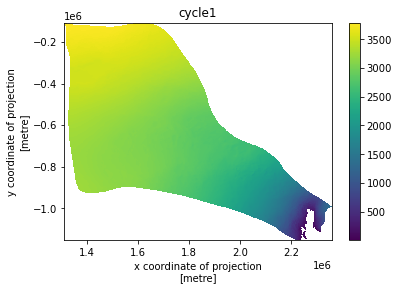

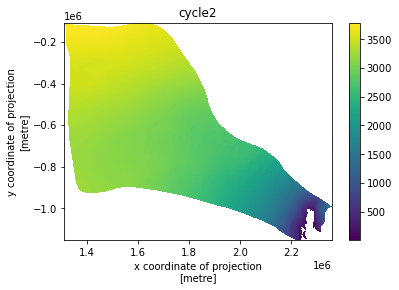

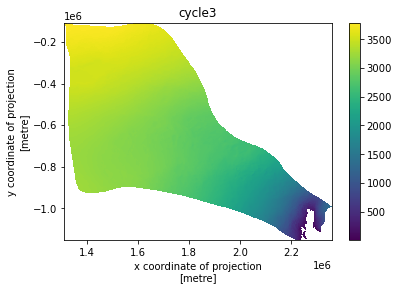

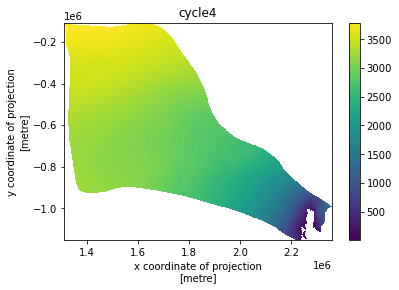

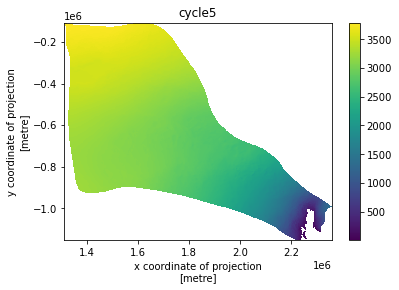

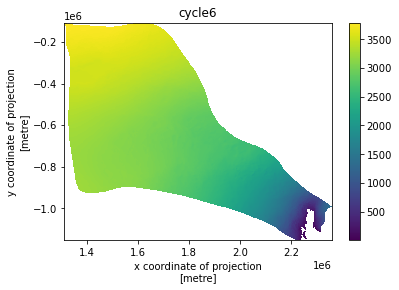

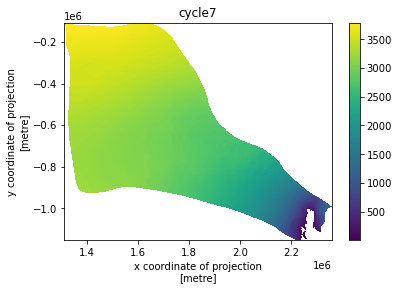

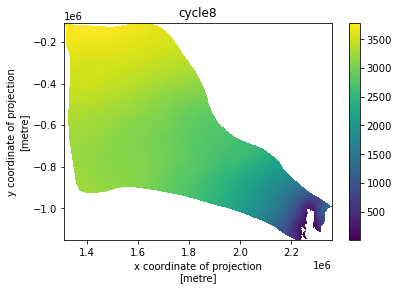

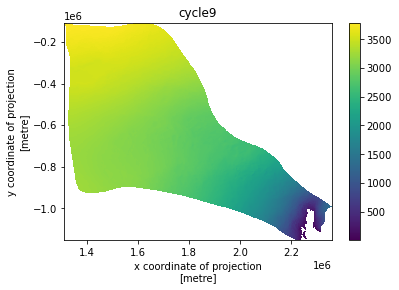

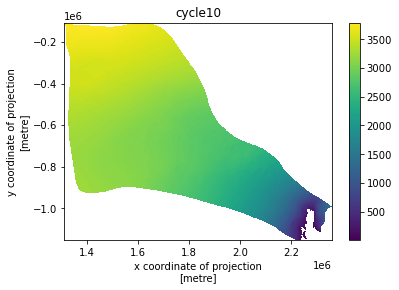

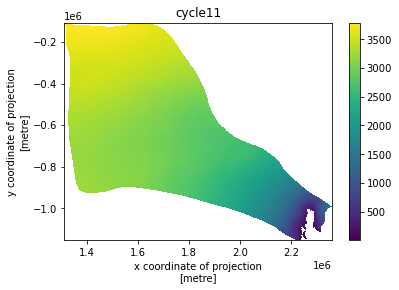

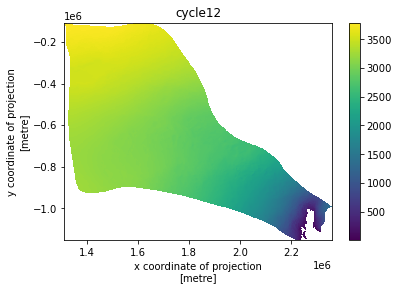

In [15]:
#Plot DEM per Cycle 
for i in range(12):
    plt.figure()
    cycle = f'cycle{i+1}'
    dems_aoi[i].plot()
    plt.title(cycle)
    #plt.savefig(fig_dir + f'atl15_dem_{cycle}.png')
    plt.show()

### 2. Calculate Ice Thickness per cycle 
Creates dictionary **thickness_aoi** that contains xarray dataset of ice thickness per timestamp (DEM - Bed Elevation). Dictionary keys are values 0 - 11 (the indices of the 12 cycle timestamps, so 0 = cycle 1, 1 = cycle 2 etc.) 


In [17]:
#Create dictionary of xarray datasets of ice thickness per cycle 
thickness_aoi = {} 
for i in range(12):
    th = dems_aoi[i] - bed_aoi_masked['bed']
    thickness_aoi[i] = th

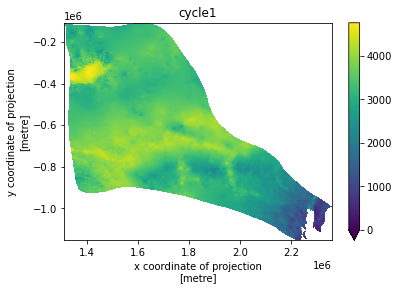

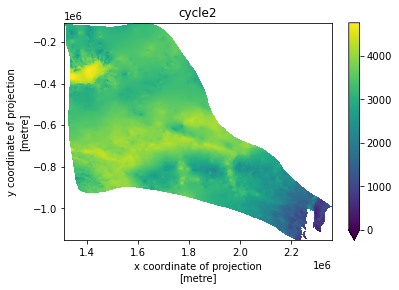

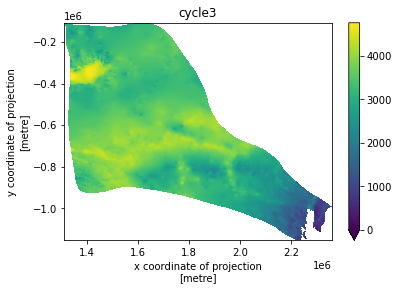

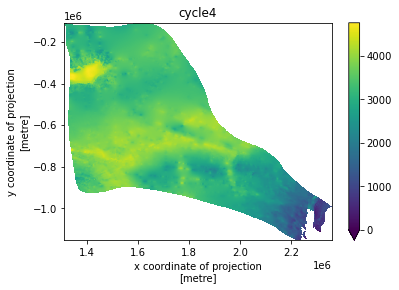

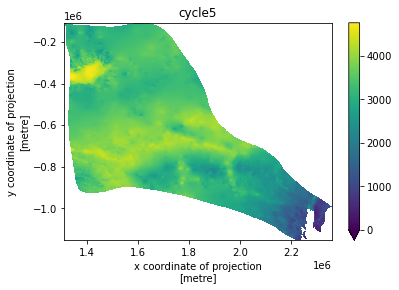

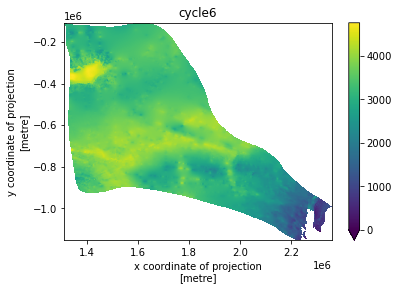

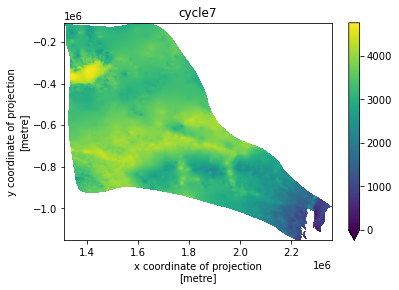

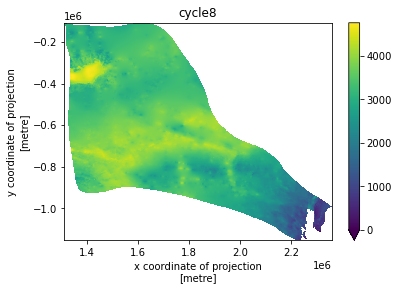

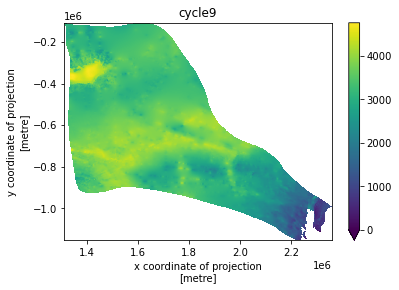

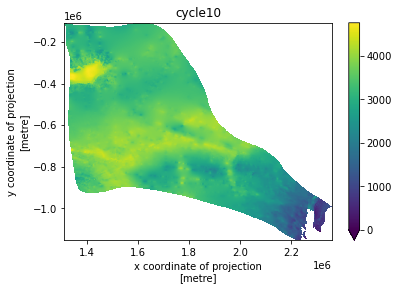

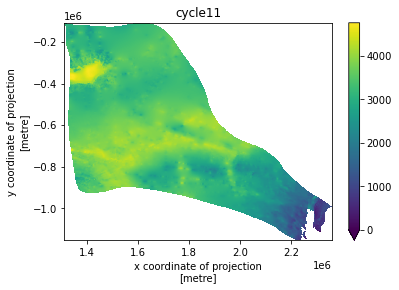

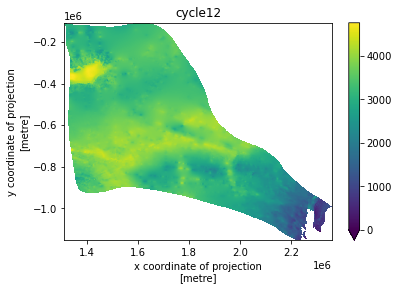

In [23]:
#Plot ice thickness per cycle 
for i in range(12):
    plt.figure()
    cycle = f'cycle{i+1}'
    thickness_aoi[i].plot(vmin=0)
    plt.title(cycle)
    plt.savefig(fig_dir + f'thickness_{cycle}.png')
    plt.show()

## Step 5: Make Fun Figures and Animations!!! 

#### a) Plot ATL14 DEM 

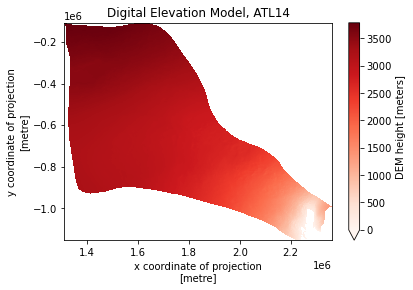

In [24]:
plt.figure()
atl_h_aoi.h.plot(vmin=0, cmap='Reds')
plt.title('Digital Elevation Model, ATL14')
plt.savefig(fig_dir + f'ATL14_DEM.png')
plt.show()

#### b) Plot ATL15 DH Maps Per Cycle 

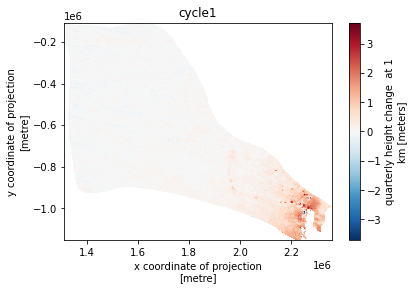

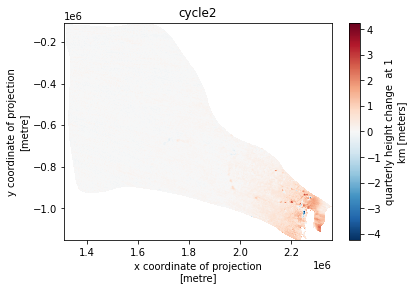

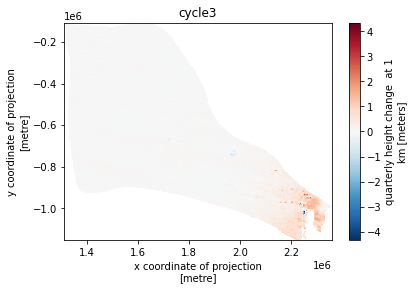

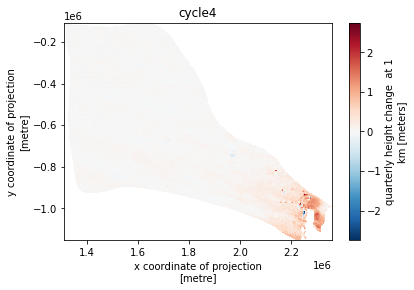

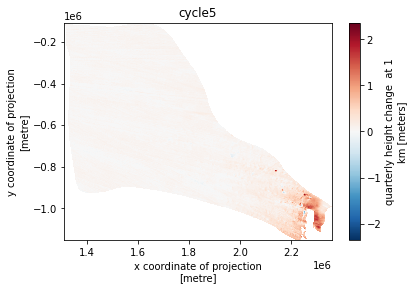

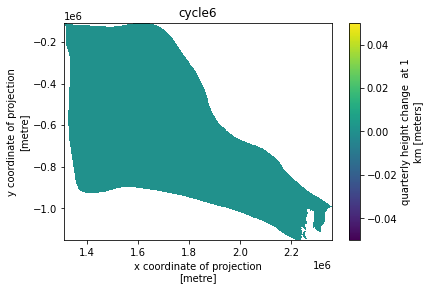

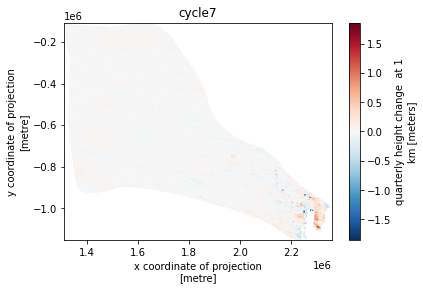

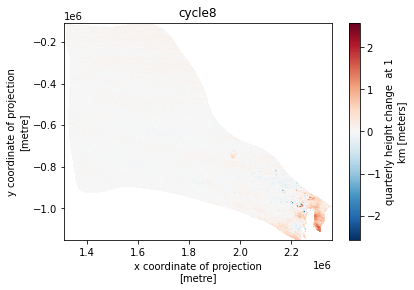

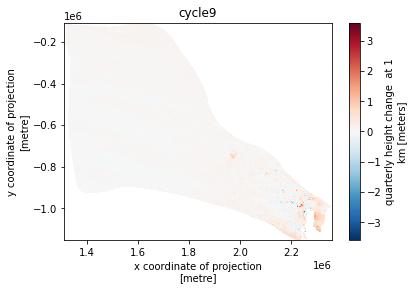

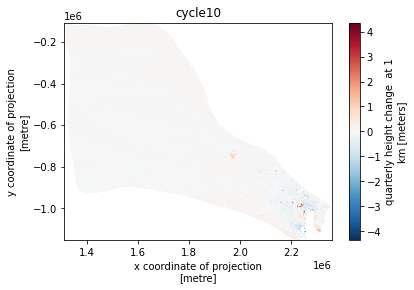

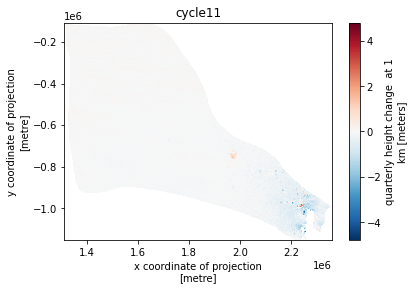

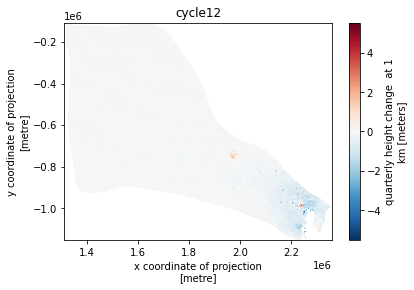

In [26]:
#Plot DH per cycle
for i in range(12):
    plt.figure()
    atl_dh_aoi.delta_h[i,:,:].plot()
    cycle = f'cycle{i+1}'
    plt.title(cycle)
    plt.savefig(f'../../../data/figs/atl15_dhdt_cycle{i}.png')
    plt.show()    

#### c) Make Gif Animation: ATL15 DH Maps Per Cycle 

In [27]:
import imageio
import os

In [28]:
fig_dir

'../../../data/figs/'

In [29]:
images = []

root = 'D:/Edinburgh (MSc)/diss/code/results/Figures/Backscatter Histograms/no_labels_1920/'
for filename in os.listdir(fig_dir):
    if filename.startswith('atl15_dhdt_'):
        images.append(imageio.imread(fig_dir+filename))
imageio.mimsave('./atl15_dhdt_allcycles.gif', images)

In [30]:
images

[Array([[[255, 255, 255,   0],
         [255, 255, 255,   0],
         [255, 255, 255,   0],
         ...,
         [255, 255, 255,   0],
         [255, 255, 255,   0],
         [255, 255, 255,   0]],
 
        [[255, 255, 255,   0],
         [255, 255, 255,   0],
         [255, 255, 255,   0],
         ...,
         [255, 255, 255,   0],
         [255, 255, 255,   0],
         [255, 255, 255,   0]],
 
        [[255, 255, 255,   0],
         [255, 255, 255,   0],
         [255, 255, 255,   0],
         ...,
         [255, 255, 255,   0],
         [255, 255, 255,   0],
         [255, 255, 255,   0]],
 
        ...,
 
        [[255, 255, 255,   0],
         [255, 255, 255,   0],
         [255, 255, 255,   0],
         ...,
         [255, 255, 255,   0],
         [255, 255, 255,   0],
         [255, 255, 255,   0]],
 
        [[255, 255, 255,   0],
         [255, 255, 255,   0],
         [255, 255, 255,   0],
         ...,
         [255, 255, 255,   0],
         [255, 255, 255,   0],
    

In [ ]:
#Plot ice thickness per cycle 
for i in range(12):
    plt.figure()
    cycle = f'cycle{i+1}'
    thickness_aoi[i].plot(vmin=0)
    plt.title(cycle)
    plt.savefig(f'../../../data/figs/thickness_cycle{i}.png')
    plt.show()